# Exploratory Data Analysis

#### Import

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load Data

In [2]:
with open("data/winequality.csv", "r") as f:
    df = pd.read_csv(f)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

#### Pre-Process

In [6]:
f"Number of Null Rows: {sum(df.isnull().any(axis=1))}"

'Number of Null Rows: 0'

#### Explore Features

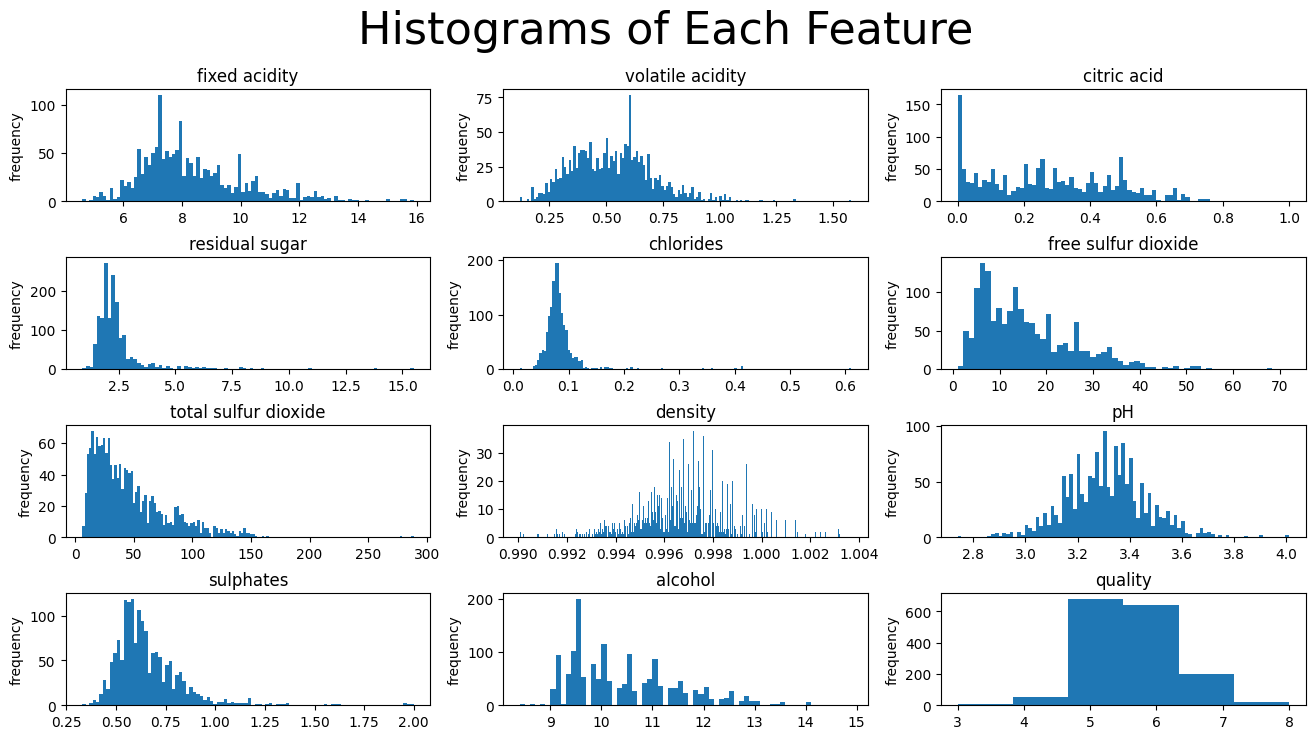

In [44]:
fig, axes = plt.subplots(4, 3, figsize=(16, 8))

for idx, col in enumerate(df.columns):
    i = idx // 3
    j = idx % 3

    axes[i, j].hist(df[col], bins=len(df[col].unique()))
    axes[i, j].set_title(col)
    axes[i, j].set_ylabel("frequency")

fig.suptitle("Histograms of Each Feature", fontsize = 32)

plt.subplots_adjust(hspace=0.5)
plt.show()